In [45]:
import pandas as pd
import numpy as np
import torch

In [46]:
words = open('/Users/raghx/Desktop/Neural Networks/makemore/names.txt','r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [47]:
for w in words[1:2]:
    for ch1 , ch2 in zip(w,w[1:]):
        print(ch1,ch2)

o l
l i
i v
v i
i a


In [48]:
b = {}
for w in words :
    chs = ['<S'] + list(w) + ['<E']
    for ch1 , ch2 in zip(chs,chs[1:]):
        biagram = (ch1,ch2)
        b[biagram] = b.get(biagram,0)+1

In [49]:
sorted(b.items(),key = lambda x : x[1],reverse=True)

[(('n', '<E'), 6763),
 (('a', '<E'), 6640),
 (('a', 'n'), 5438),
 (('<S', 'a'), 4410),
 (('e', '<E'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S', 'l'), 1572),
 (('<S', 'c'), 1542),
 (('<S', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '<E'), 137

In [50]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [51]:
chars = sorted(list(set(''.join(words))))


stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}


N = torch.zeros((27,27),dtype=torch.int32)
for w in words:
    chs = ['.'] + list(w) + ['.'] 
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

        

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

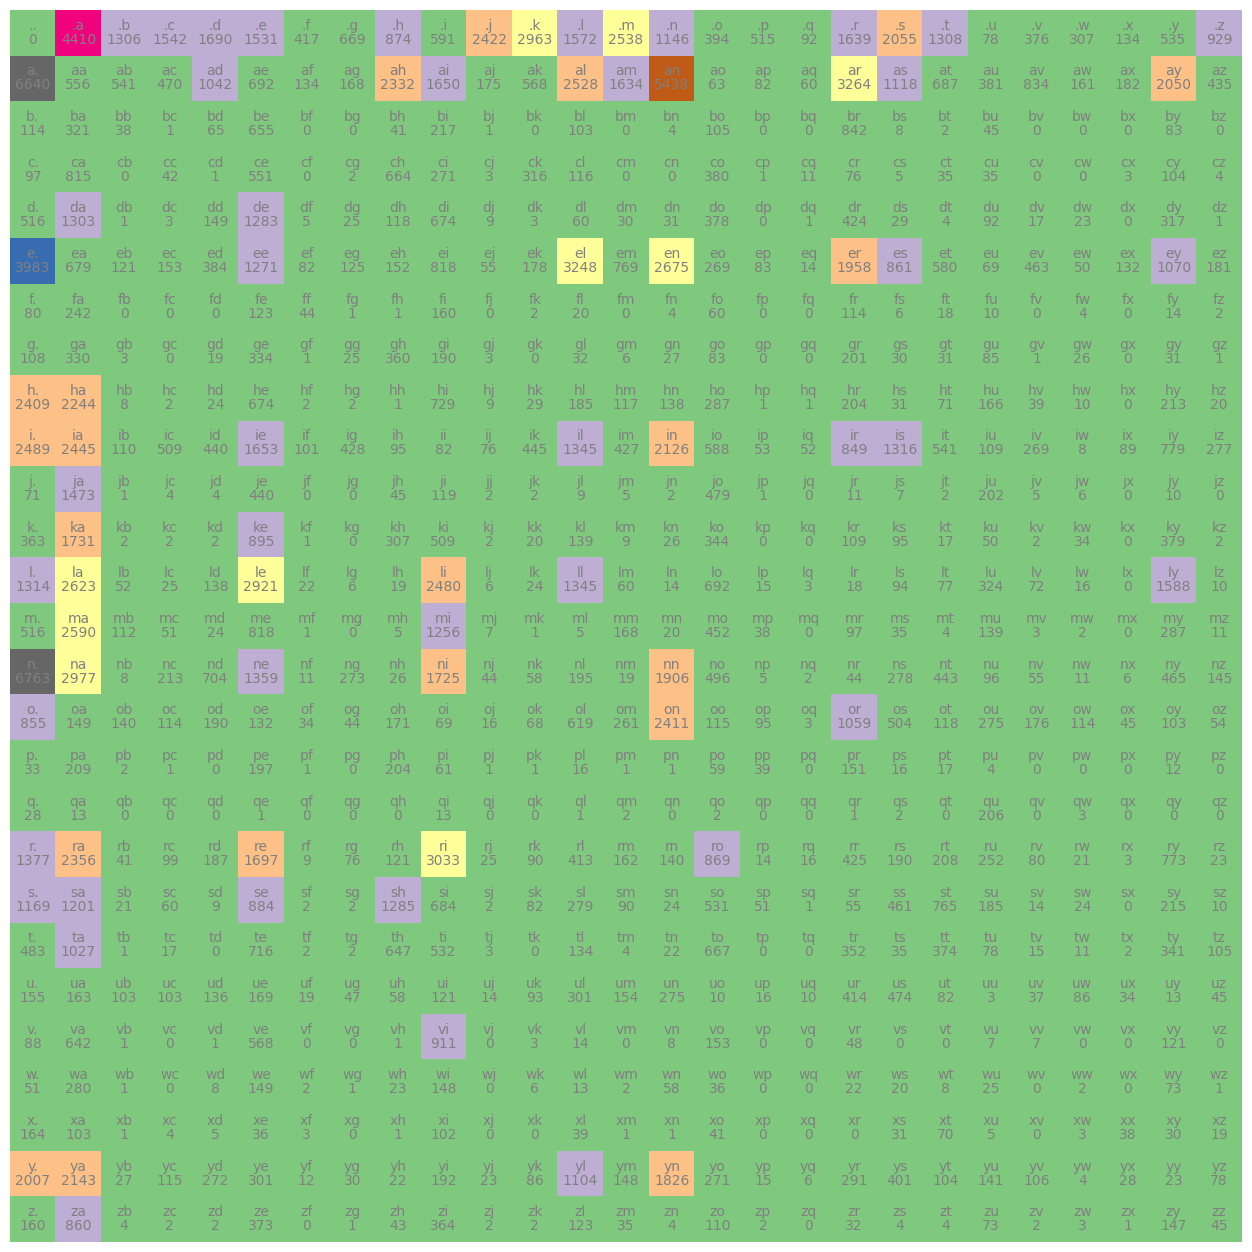

In [52]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Accent')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')

In [53]:
# #normalising 
# p = N[0].float()
# p /= p.sum()
# p


In [54]:
# g = torch.Generator().manual_seed(21134)
# index = torch.multinomial(p,1,replacement=True,generator=g).item()
# index


In [55]:
# Creting a probability matrix(tensor)
P = (N+1).float()      # +1 helps in smothenng the matrix , so there is no infinite output when taking log 
P /= P.sum(1,keepdim=True)
P

tensor([[3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
         1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
         4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
         5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
         4.2109e-03, 1.6719e-02, 2.9008e-02],
        [1.9583e-01, 1.6425e-02, 1.5983e-02, 1.3889e-02, 3.0756e-02, 2.0435e-02,
         3.9809e-03, 4.9835e-03, 6.8796e-02, 4.8685e-02, 5.1899e-03, 1.6779e-02,
         7.4575e-02, 4.8213e-02, 1.6039e-01, 1.8872e-03, 2.4475e-03, 1.7988e-03,
         9.6279e-02, 3.2997e-02, 2.0288e-02, 1.1264e-02, 2.4623e-02, 4.7771e-03,
         5.3963e-03, 6.0480e-02, 1.2857e-02],
        [4.3039e-02, 1.2051e-01, 1.4596e-02, 7.4850e-04, 2.4701e-02, 2.4551e-01,
         3.7425e-04, 3.7425e-04, 1.5719e-02, 8.1587e-02, 7.4850e-04, 3.7425e-04,
         3.8922e-02, 3.7425e-04, 1.8713e-03, 3.9671e-02, 3.7425e-04, 3.7425e-04,
         3.1549e-

In [56]:
g = torch.Generator().manual_seed(21134)

for i in range(10):
 K = []
 ix = 0
 while True:
     #  p = N[ix].float()
     #  p = p / p.sum()
     p = P[ix]
     ix = torch.multinomial(p,1,replacement=True,generator=g).item()
     K.append(itos[ix])

     if ix == 0:
        break

 print(''.join(K))



avevivelmyasieet.
nildyor.
jegilediarbliaheliralakaliti.
cralinayoraelynn.
jorie.
me.
var.
ockyn.
bemexa.
mallliedinai.


In [57]:
# Loss function calculation using log liklihood 
n = 0
log_liklihood = 0
for w in words:
    chs = ['.']+list(w)+['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        log_prob = torch.log(prob)       # log probability of single biagram
        log_liklihood += log_prob        # log probability of all -> log liklihood
        n += 1   
        # print(f'{ch1}{ch2}:{prob:.4f}{log_prob:.4f}')                    



nll = - log_liklihood  # negative log liklihood
loss = nll/n
loss




tensor(2.4544)

In [58]:
# xs = []
# ys = []
# for w in words[:2]:
#   chs = ['.']+list(w)+['.']
#   for ch1,ch2 in zip(chs,chs[1:]):
#     ix1 = stoi[ch1]
#     ix2 = stoi[ch2]
#     xs.append(ix1)
#     ys.append(ix2)


# xs = torch.tensor(xs)
# ys = torch.tensor(ys)


In [59]:
# xs

In [60]:
# ys

In [61]:
from torch.nn.functional import one_hot
# xencoded = one_hot(xs,num_classes=27).float()
# xencoded

In [62]:
# logits = xencoded @ weights
# counts = logits.exp()
# probs = counts/counts.sum(1,keepdim=True)
# probs


In [63]:
generator = torch.Generator().manual_seed(2147483647)
weights = torch.randn((27,27),generator=generator,requires_grad=True)
weights

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9644e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2844e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4040e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0731e-02,
          2.4968e+00,  2.4448e+00],
        [-6.7006e-01, -1.2199e+00,  3.0314e-01, -1.0725e+00,  7.2762e-01,
          5.1114e-02,  1.3095e+00, -8.0220e-01, -8.5042e-01, -1.8068e+00,
          1.2523e+00, -1.2256e+00,  1.2165e+00, -9.6478e-01, -2.3211e-01,
         -3.4762e-01,  3.3244e-01, -1.3263e+00,  1.1224e+00,  5.9641e-01,
          4.5846e-01,  5.4011e-02, -1.7400e+00,  1.1560e-01,  8.0319e-01,
          5.4108e-01, -1.1646e+00],
        [ 1.4756e-01, -1.0006e+00,  3.8012e-01,  4.7328e-01, -9.1027e-01,
         -7.8305e-01,  1.3506e-01, -2.1161e-01, -1.0406e+00, -1.5367e+00,
          9.3743e-01, -8.8303e-01,  1.74

In [64]:
xs = []
ys = []
for w in words:
    chs = ['.']+list(w)+['.']
    for ch1,ch2 in zip(chs,chs[1:]):
      ix1 = stoi[ch1]
      ix2 = stoi[ch2]
      xs.append(ix1)
      ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
noBiagram = ys.nelement()

In [65]:
for k in range(200):
  #forward pass
  xencoded = one_hot(xs,num_classes=27).float()
  logits = xencoded @ weights
  counts = logits.exp()
  probs = counts/counts.sum(1,keepdim=True)
  loss = - probs[torch.arange(noBiagram),ys].log().mean() + 0.01 * (weights**2).mean()  # torch.arange gets the indexs of ys i.e. 0,1,2,3...... and ys gets index from column  and in the output gives probability of required index 
  print(loss.item())

  # Backward pass 
  weights.grad = None
  loss.backward()
  weights.data += -50 * weights.grad       # updating tensor 




3.76861834526062
3.3788065910339355
3.161090850830078
3.0271859169006348
2.9344842433929443
2.867231607437134
2.8166542053222656
2.777146339416504
2.7452542781829834
2.7188305854797363
2.696505546569824
2.6773719787597656
2.6608054637908936
2.6463515758514404
2.633665084838867
2.622471570968628
2.6125476360321045
2.6037068367004395
2.595794439315796
2.5886809825897217
2.582256317138672
2.5764293670654297
2.5711236000061035
2.566272735595703
2.5618226528167725
2.5577261447906494
2.5539445877075195
2.550442695617676
2.5471930503845215
2.5441696643829346
2.5413525104522705
2.538722038269043
2.536262035369873
2.5339579582214355
2.531797409057617
2.5297679901123047
2.527860164642334
2.526063919067383
2.5243709087371826
2.522773265838623
2.52126407623291
2.519836664199829
2.5184855461120605
2.517204999923706
2.515990972518921
2.5148372650146484
2.5137410163879395
2.512698173522949
2.511704444885254
2.5107579231262207
2.509855031967163
2.5089924335479736
2.5081682205200195
2.5073797702789307


In [66]:
# Retrival

g = torch.Generator().manual_seed(21134)

for i in range(10):
 K = []
 ix = 0
 while True:
  xencoded = one_hot(torch.tensor([ix]),num_classes=27).float()        # Important to note about use of tensor([ix]) instead of xs
  logits = xencoded @ weights
  counts = logits.exp()
  probs = counts/counts.sum(1,keepdim=True)
  ix = torch.multinomial(probs,1,replacement=True,generator=g).item()
  K.append(itos[ix])

  if ix == 0:
        break
 print(''.join(K)) 

avevivelmyasieet.
nildyor.
jegilediarbliaheliralakxieri.
cralihayoraelynn.
jorie.
me.
vm.
jockyn.
bemexa.
mallliedinai.


In [67]:
ix = 0
X = []
Y = []
block_Size = 3
for w in words[:3]:
  print(w)
  context = [0] * block_Size
  for ch in w + '.':
    ix = stoi[ch]
    print(''.join(itos[i] for i in context),'->',ch)
    X.append(context)
    Y.append(ix)
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)




emma
... -> e
..e -> m
.em -> m
emm -> a
mma -> .
olivia
... -> o
..o -> l
.ol -> i
oli -> v
liv -> i
ivi -> a
via -> .
ava
... -> a
..a -> v
.av -> a
ava -> .


In [68]:
lookup_table = torch.randn((27,2))
embedding = lookup_table[X]
embedding.shape

torch.Size([16, 3, 2])

In [69]:
w1 = torch.randn((6,100))
b1 = torch.randn(100)
emb = embedding.view(embedding.shape[0],6)
h = torch.tanh(emb @ w1  + b1)
h.shape

torch.Size([16, 100])

In [70]:
w2 = torch.randn((100,27))
b2 = torch.randn(27)
logits = h @ w2  + b2
logits.shape

torch.Size([16, 27])

In [71]:
counts = logits.exp()
probs = counts / counts.sum(1,keepdim=True)
probs


tensor([[1.1818e-06, 5.9740e-04, 4.4718e-06, 4.4470e-07, 4.0161e-10, 1.3618e-11,
         9.5759e-01, 7.8476e-12, 3.3438e-04, 4.6021e-06, 3.7174e-02, 8.7288e-09,
         5.5453e-15, 3.0998e-07, 7.7032e-16, 2.0887e-07, 3.9761e-04, 8.2464e-11,
         6.3947e-07, 3.8484e-06, 1.3302e-07, 2.5667e-16, 6.3033e-13, 2.4652e-06,
         4.6044e-04, 3.4276e-03, 1.2515e-11],
        [3.7811e-05, 2.0853e-04, 1.3022e-01, 6.7572e-01, 5.7459e-12, 4.0148e-10,
         1.3119e-06, 3.7051e-11, 5.4306e-11, 1.1769e-08, 1.1277e-04, 1.4314e-07,
         6.6283e-15, 2.5832e-11, 1.8317e-15, 1.5610e-05, 3.0602e-04, 3.8697e-11,
         3.0212e-08, 3.4011e-03, 5.6660e-14, 2.5240e-25, 2.4919e-15, 8.5796e-08,
         1.8231e-13, 1.8997e-01, 6.3256e-13],
        [2.4978e-04, 2.1660e-04, 2.3596e-02, 2.5425e-06, 4.3482e-06, 8.6995e-07,
         1.8064e-03, 4.7218e-08, 1.9453e-02, 9.0012e-05, 1.6601e-04, 2.5134e-12,
         8.2928e-11, 3.7118e-01, 6.2904e-13, 1.1953e-06, 8.0503e-03, 4.3697e-09,
         7.6789e-

In [72]:
log_prob += probs[torch.arange(16),Y].log().mean()
loss = -log_prob
loss

tensor(18.8522)

In [88]:
ix = 0
X = []
Y = []
block_Size = 3
for w in words:
  context = [0] * block_Size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)


In [90]:
g = torch.Generator().manual_seed(38211)
C = torch.randn((27,2),generator=g,requires_grad=True)               #lookup table
w1 = torch.randn((6,100),generator=g,requires_grad=True)
b1 = torch.randn(100,generator=g,requires_grad=True)
w2 = torch.randn((100,27),generator=g,requires_grad=True)
b2 = torch.randn(27,generator=g,requires_grad=True)
params = [C,w1,w2,b1,b2]


In [91]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [92]:
lrei=[]
lossi=[]
for k in range(1000):  
    #forward pass
    index = torch.randint(0,X.shape[0],(32,))   #minibatch
    embd = C[X[index]]
    embd = embd.view(-1,6)                # embedding
    a = torch.tanh(embd @ w1 + b1)    # a -> (n,100)
    logits = a @ w2 + b2 
    loss = F.cross_entropy(logits,Y[index])

    #BackwardPass
    for p in params:
        p.grad = None

    loss.backward()

    lr = lrs[k]
    for p in params:
        p.data += -lr * p.grad

    lrei.append(lre[k])  
    lossi.append(loss.item()) 
print(loss)



tensor(9.4203, grad_fn=<NllLossBackward0>)


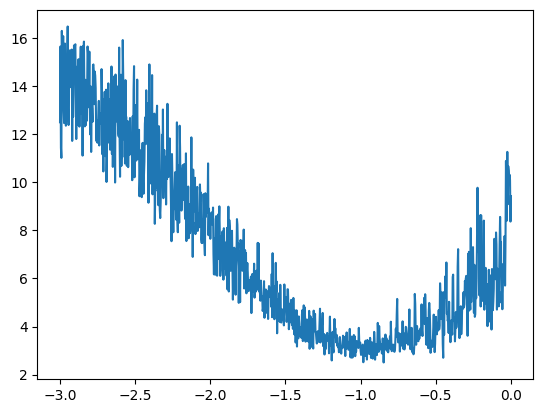

In [93]:
plt.plot(lrei,lossi)    # used to find initial learning ratee


In [110]:
g = torch.Generator().manual_seed(38211)
C = torch.randn((27,10),generator=g,requires_grad=True)             #increased dimensions of lookup table from 2 -> 10
w1 = torch.randn((30,100),generator=g,requires_grad=True)
b1 = torch.randn(100,generator=g,requires_grad=True)
w2 = torch.randn((100,27),generator=g,requires_grad=True)
b2 = torch.randn(27,generator=g,requires_grad=True)
params = [C,w1,w2,b1,b2]

In [102]:
#creting train,val,test dataset -> 80,10,10
def build_dataset(words):
  X = []
  Y = []
  block_Size = 3
  for w in words:
    context = [0] * block_Size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  return X,Y

In [103]:
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))
X_train,Y_train = build_dataset(words[:n1])
X_val,Y_val = build_dataset(words[n1:n2])
X_test,Y_test = build_dataset(words[n2:])
print(X_train.shape,X_val.shape,X_test.shape,Y_train.shape,Y_val.shape,Y_test.shape)


torch.Size([182778, 3]) torch.Size([22633, 3]) torch.Size([22735, 3]) torch.Size([182778]) torch.Size([22633]) torch.Size([22735])


In [109]:
loss_i = []
epoches = []

In [111]:
for k in range(50000):  
    #forward pass
    index = torch.randint(0,X_train.shape[0],(32,)) 
    embd = C[X_train[index]]
    embd = embd.view(-1,30)               
    a = torch.tanh(embd @ w1 + b1)    
    logits = a @ w2 + b2 
    loss = F.cross_entropy(logits,Y_train[index])

    #BackwardPass
    for p in params:
        p.grad = None

    loss.backward()

    # lr = lrs[k]
    for p in params:
        p.data += -0.1 * p.grad
    loss_i.append(loss.log10().item())
    epoches.append(k)

print(loss)


tensor(2.4810, grad_fn=<NllLossBackward0>)


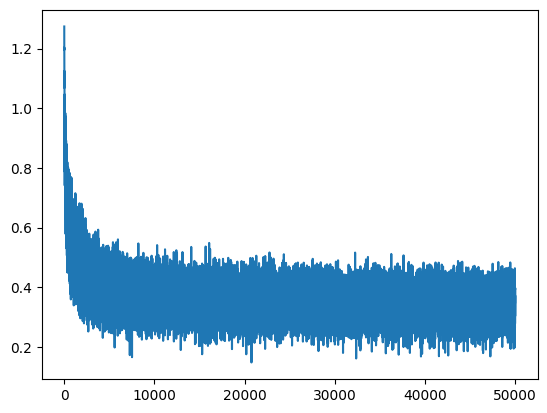

In [112]:
plt.plot(epoches,loss_i)

In [ ]:
embd = C[X_train]
embd = embd.view(-1,30)               
a = torch.tanh(embd @ w1 + b1)    
logits = a @ w2 + b2 
loss = F.cross_entropy(logits,Y_train)
loss

tensor(2.2154, grad_fn=<NllLossBackward0>)

In [ ]:
embd = C[X_val]
embd = embd.view(-1,30)               
a = torch.tanh(embd @ w1 + b1)    
logits = a @ w2 + b2 
loss = F.cross_entropy(logits,Y_val)
loss

tensor(2.4810, grad_fn=<NllLossBackward0>)

In [ ]:
# sample from the model
g = torch.Generator().manual_seed(2167776)

for _ in range(20):
    
    out = []
    context = [0] * block_Size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ w1 + b1)
      logits = h @ w2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

zoilanytlynn.
dimericele.
gymafwtanavarit.
leon.
eza.
deyen.
araleanna.
anle.
shlyn.
arson.
ty.
dariyah.
kyn.
noema.
kengushaytiniqu.
kynzi.
salesiri.
cyrien.
sashris.
adve.
